In [1]:
# Dependencies & Setup
%matplotlib notebook
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [2]:
# Grab data source files 
city_data = "../Pyber/data/city_data.csv"
ride_data = "../Pyber/data/ride_data.csv"

city_data_df = pd.read_csv(city_data)
ride_data_df = pd.read_csv(ride_data)

# Merge the city_data & ride_data
combined_df = pd.merge(city_data_df, ride_data_df,
                                 how='outer', on='city')
combined_df.head()

,city,driver_count,type,date,fare,ride_id
0,Richardfort,38,Urban,2018-02-24 08:40:38,13.93,5628545007794
1,Richardfort,38,Urban,2018-02-13 12:46:07,14.00,910050116494
2,Richardfort,38,Urban,2018-02-16 13:52:19,17.92,820639054416
3,Richardfort,38,Urban,2018-02-01 20:18:28,10.26,9554935945413
4,Richardfort,38,Urban,2018-04-17 02:26:37,23.00,720020655850


# Gather Ride Sharing Data

In [3]:
# Obtain the x and y coordinates for each of the three city types
Urban_data = combined_df.loc[combined_df['type'] == "Urban"]
urban_avg_fare = Urban_data.groupby('city')['fare'].mean()
urban_ride_count = Urban_data.groupby('city')['ride_id'].count()
urban_driver_count = Urban_data.groupby('city')['driver_count'].sum()

Suburban_data = combined_df.loc[combined_df['type'] == "Suburban"]
suburban_avg_fare = Suburban_data.groupby('city')['fare'].mean()
suburban_ride_count = Suburban_data.groupby('city')['ride_id'].count()
suburban_driver_count = Suburban_data.groupby('city')['driver_count'].sum()

Rural_data = combined_df.loc[combined_df['type'] == "Rural"]
rural_avg_fare = Rural_data.groupby('city')['fare'].mean()
rural_ride_count = Rural_data.groupby('city')['ride_id'].count()
rural_driver_count = Rural_data.groupby('city')['driver_count'].sum()

# Create Bubble Plot 

<IPython.core.display.Javascript object>


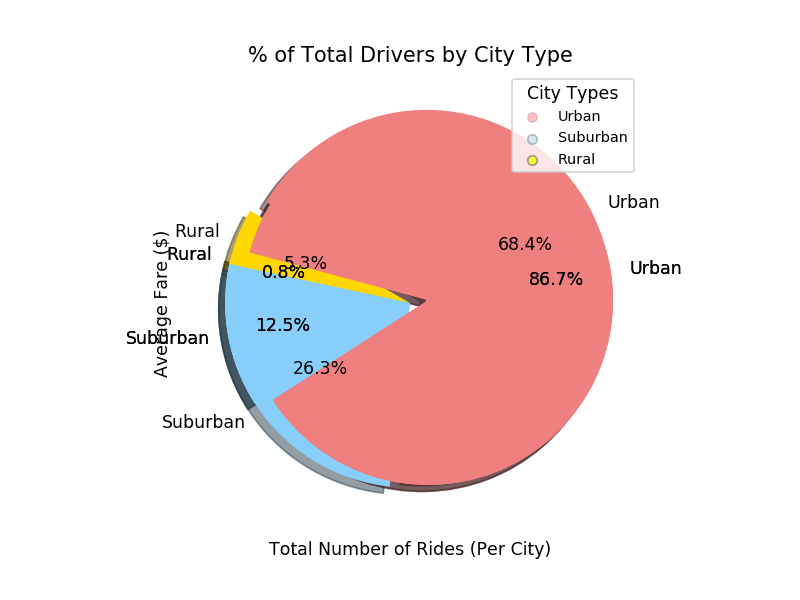

In [4]:
# Build the scatter plots for each city types
plt.scatter(urban_ride_count, 
            urban_avg_fare, 
            s=10*urban_driver_count, c="red", alpha=.25, edgecolors="grey", linewidths=1, marker="o", label="Urban")

plt.scatter(suburban_ride_count, 
            suburban_avg_fare, 
            s=10*suburban_driver_count, c="lightblue", alpha=.5, edgecolors="grey", linewidths=1, marker="o", label="Suburban")

plt.scatter(rural_ride_count, 
            rural_avg_fare, 
            s=10*rural_driver_count, c="yellow", alpha=.75, edgecolors="grey", linewidths=1, marker="o", label="Rural")

# Incorporate the other graph properties
plt.title("Pyber Ride Sharing Data (2016)")
plt.ylabel("Average Fare ($)")
plt.xlabel("Total Number of Rides (Per City)")
plt.grid(True)

# Create a legend
lgnd = plt.legend(fontsize="small", mode="Expanded", 
                  numpoints=1, scatterpoints=1, 
                  loc="best", title="City Types", 
                  labelspacing=0.5)
lgnd.legendHandles[0]._sizes = [30]
lgnd.legendHandles[1]._sizes = [30]
lgnd.legendHandles[2]._sizes = [30]

# Incorporate a text label regarding circle size
plt.text(42, 35, "Note:\nCircle size correlates with driver count per city.")

# Save Figure
plt.savefig("../Pyber/RideSharePlot.png")

# Show plot
plt.show()

# Total Fares by City Type

In [5]:
# Calculate Ride Percents
ride_percents = 100 * combined_df.groupby(["type"]).count()["ride_id"] / combined_df["ride_id"].count()

# Build Pie Chart
plt.pie(ride_percents, 
        labels=["Rural", "Suburban", "Urban"], 
        colors=["gold", "lightskyblue", "lightcoral"], 
        explode=[0, 0, 0.1], 
        autopct='%1.1f%%', 
        shadow=True, startangle=150)
plt.title("% of Total Rides by City Type")

# Save Figure
plt.savefig("../Pyber/TotalFares_CityType.png")

# Show Figure
plt.show()

# Total Rides by City Type

In [6]:
# Calculate Driver Percents
driver_percents = 100 * combined_df.groupby(["type"]).sum()["driver_count"] / combined_df["driver_count"].sum()

# Build Pie Charts
plt.pie(driver_percents, 
        labels=["Rural", "Suburban", "Urban"], 
        colors=["gold", "lightskyblue", "lightcoral"], 
        explode=[0, 0, 0.1], 
        autopct='%1.1f%%', pctdistance=0.70,
        shadow=True, startangle=165)
plt.title("% of Total Drivers by City Type")

# Save Figure
plt.savefig("../Pyber/TotalRides_CityType.png")

# Show Figure
plt.show()

# Total Drivers by City Type

In [7]:
# Calculate Driver Percents
driver_percents = 100 * combined_df.groupby(["type"]).sum()["driver_count"] / combined_df["driver_count"].sum()

# Build Pie Charts
plt.pie(driver_percents, 
        labels=["Rural", "Suburban", "Urban"], 
        colors=["gold", "lightskyblue", "lightcoral"], 
        explode=[0, 0, 0.1], 
        autopct='%1.1f%%', pctdistance=0.70,
        shadow=True, startangle=165)
plt.title("% of Total Drivers by City Type")

# Save Figure
plt.savefig("../Pyber/TotalDriveres_CityType.png")

# Show Figure
plt.show()